In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/human_cognitive_performance.csv")

df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [ ]:
df.shape

(80000, 13)

In [ ]:
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Sleep_Duration,0
Stress_Level,0
Diet_Type,0
Daily_Screen_Time,0
Exercise_Frequency,0
Caffeine_Intake,0
Reaction_Time,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [ ]:
df.describe()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005332,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395,58.121357
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522,23.119598
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000,40.850000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000,75.890000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000,100.000000


In [ ]:
for column in df.columns:
  if df[column].dtype == "object":
    print(column)
    print(df[column].unique())
    print()


User_ID
['U1' 'U2' 'U3' ... 'U79998' 'U79999' 'U80000']

Gender
['Female' 'Male' 'Other']

Diet_Type
['Non-Vegetarian' 'Vegetarian' 'Vegan']

Exercise_Frequency
['Medium' 'High' 'Low']



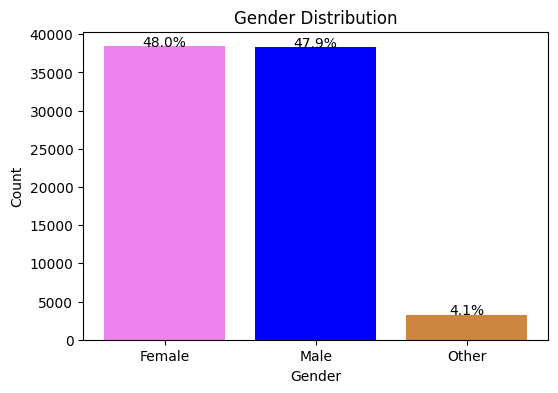

In [ ]:
counts = df['Gender'].value_counts()
ratios = (counts / counts.sum()) * 100  # convert to %

# Plot
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.2, f"{ratios.iloc[i]:.1f}%", ha='center')
colors = ['violet', 'blue', 'peru']

plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

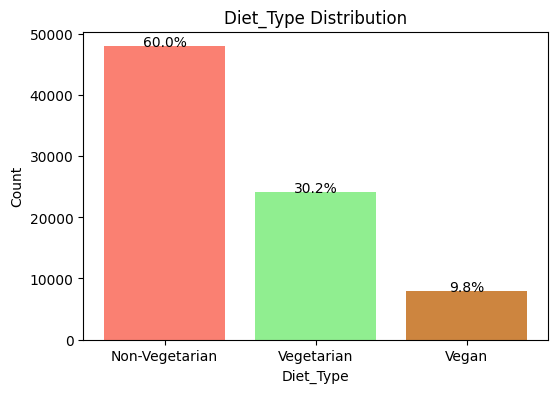

In [ ]:
counts = df['Diet_Type'].value_counts()
ratios = (counts / counts.sum()) * 100  # convert to %

# Plot
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.2, f"{ratios.iloc[i]:.1f}%", ha='center')
colors = ['salmon', 'lightgreen', 'peru']

plt.bar(counts.index, counts.values, color=colors)
plt.xlabel("Diet_Type")
plt.ylabel('Count')
plt.title('Diet_Type Distribution')
plt.show()

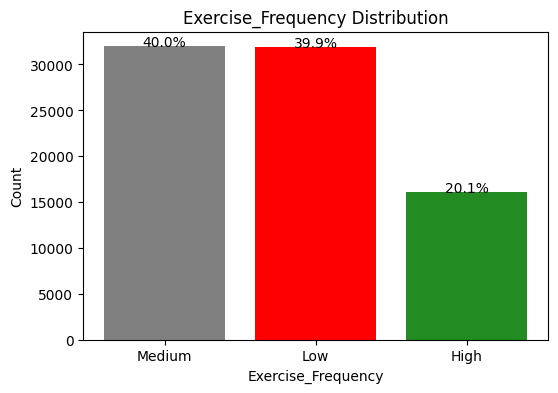

In [ ]:
counts = df['Exercise_Frequency'].value_counts()
ratios = (counts / counts.sum()) * 100  # convert to %

# Plot
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.2, f"{ratios.iloc[i]:.1f}%", ha='center')
colors = ['gray', 'red', 'forestgreen']

plt.bar(counts.index, counts.values, color=colors)
plt.xlabel("Exercise_Frequency")
plt.ylabel('Count')
plt.title('Exercise_Frequency Distribution')
plt.show()

In [ ]:
data=df.drop(columns=['User_ID', 'AI_Predicted_Score'])
data.head()

,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score
0,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71
1,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35
2,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57
3,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15
4,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54


In [ ]:
df_encoded = pd.get_dummies(data, columns=['Gender', 'Diet_Type'], drop_first=False)


df_encoded.head()


,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,57,6.5,3,6.5,Medium,41,583.33,65,36.71,True,False,False,True,False,False
1,39,7.6,9,10.8,High,214,368.24,58,54.35,True,False,False,True,False,False
2,26,8.2,6,5.7,Low,429,445.21,49,32.57,False,True,False,False,False,True
3,32,7.8,9,8.3,Low,464,286.33,94,70.15,False,True,False,False,False,True
4,50,9.7,2,11.3,Medium,365,237.65,62,87.54,False,True,False,True,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 80000 non-null  int64  
 1   Gender              80000 non-null  object 
 2   Sleep_Duration      80000 non-null  float64
 3   Stress_Level        80000 non-null  int64  
 4   Diet_Type           80000 non-null  object 
 5   Daily_Screen_Time   80000 non-null  float64
 6   Exercise_Frequency  80000 non-null  object 
 7   Caffeine_Intake     80000 non-null  int64  
 8   Reaction_Time       80000 non-null  float64
 9   Memory_Test_Score   80000 non-null  int64  
 10  Cognitive_Score     80000 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 6.7+ MB


In [ ]:
bool_cols = df_encoded.select_dtypes(include='bool').columns


df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


df_encoded.head()


,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,57,6.5,3,6.5,Medium,41,583.33,65,36.71,1,0,0,1,0,0
1,39,7.6,9,10.8,High,214,368.24,58,54.35,1,0,0,1,0,0
2,26,8.2,6,5.7,Low,429,445.21,49,32.57,0,1,0,0,0,1
3,32,7.8,9,8.3,Low,464,286.33,94,70.15,0,1,0,0,0,1
4,50,9.7,2,11.3,Medium,365,237.65,62,87.54,0,1,0,1,0,0


In [ ]:
print(data['Exercise_Frequency'].unique())


['Medium' 'High' 'Low']


In [ ]:

exercise_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df_encoded['Exercise_Frequency'] = df_encoded['Exercise_Frequency'].map(exercise_map)

df_encoded.head()


,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,57,6.5,3,6.5,1,41,583.33,65,36.71,1,0,0,1,0,0
1,39,7.6,9,10.8,2,214,368.24,58,54.35,1,0,0,1,0,0
2,26,8.2,6,5.7,0,429,445.21,49,32.57,0,1,0,0,0,1
3,32,7.8,9,8.3,0,464,286.33,94,70.15,0,1,0,0,0,1
4,50,9.7,2,11.3,1,365,237.65,62,87.54,0,1,0,1,0,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       80000 non-null  int64  
 1   Sleep_Duration            80000 non-null  float64
 2   Stress_Level              80000 non-null  int64  
 3   Daily_Screen_Time         80000 non-null  float64
 4   Exercise_Frequency        80000 non-null  int64  
 5   Caffeine_Intake           80000 non-null  int64  
 6   Reaction_Time             80000 non-null  float64
 7   Memory_Test_Score         80000 non-null  int64  
 8   Cognitive_Score           80000 non-null  float64
 9   Gender_Female             80000 non-null  int64  
 10  Gender_Male               80000 non-null  int64  
 11  Gender_Other              80000 non-null  int64  
 12  Diet_Type_Non-Vegetarian  80000 non-null  int64  
 13  Diet_Type_Vegan           80000 non-null  int64  
 14  Diet_T

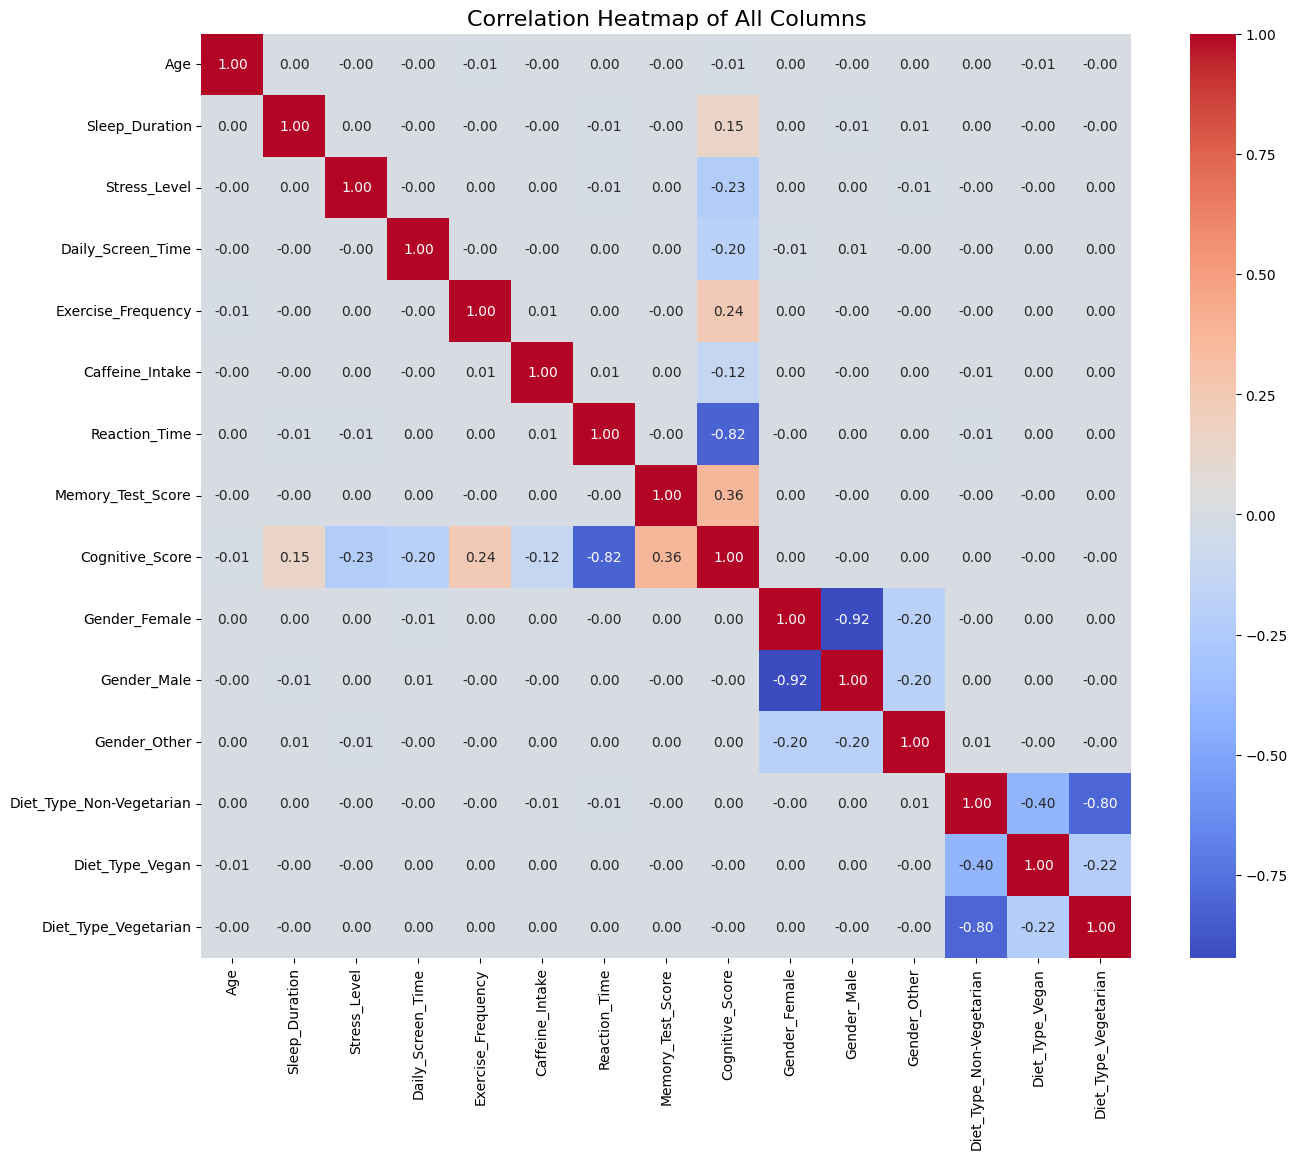

In [ ]:

corr_matrix = df_encoded.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of All Columns", fontsize=16)
plt.show()



In [ ]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                               Age  Sleep_Duration  Stress_Level  \
Age                       1.000000        0.000691     -0.000114   
Sleep_Duration            0.000691        1.000000      0.004940   
Stress_Level             -0.000114        0.004940      1.000000   
Daily_Screen_Time        -0.002442       -0.000376     -0.004818   
Exercise_Frequency       -0.009757       -0.003531      0.003323   
Caffeine_Intake          -0.004267       -0.002482      0.001048   
Reaction_Time             0.004668       -0.009699     -0.011374   
Memory_Test_Score        -0.002198       -0.001525      0.000852   
Cognitive_Score          -0.005976        0.150595     -0.227639   
Gender_Female             0.000351        0.004057      0.002572   
Gender_Male              -0.002165       -0.006297      0.000315   
Gender_Other              0.004575        0.005647     -0.007279   
Diet_Type_Non-Vegetarian  0.004111        0.003401     -0.003336   
Diet_Type_Vegan          -0.005488       -0.0004

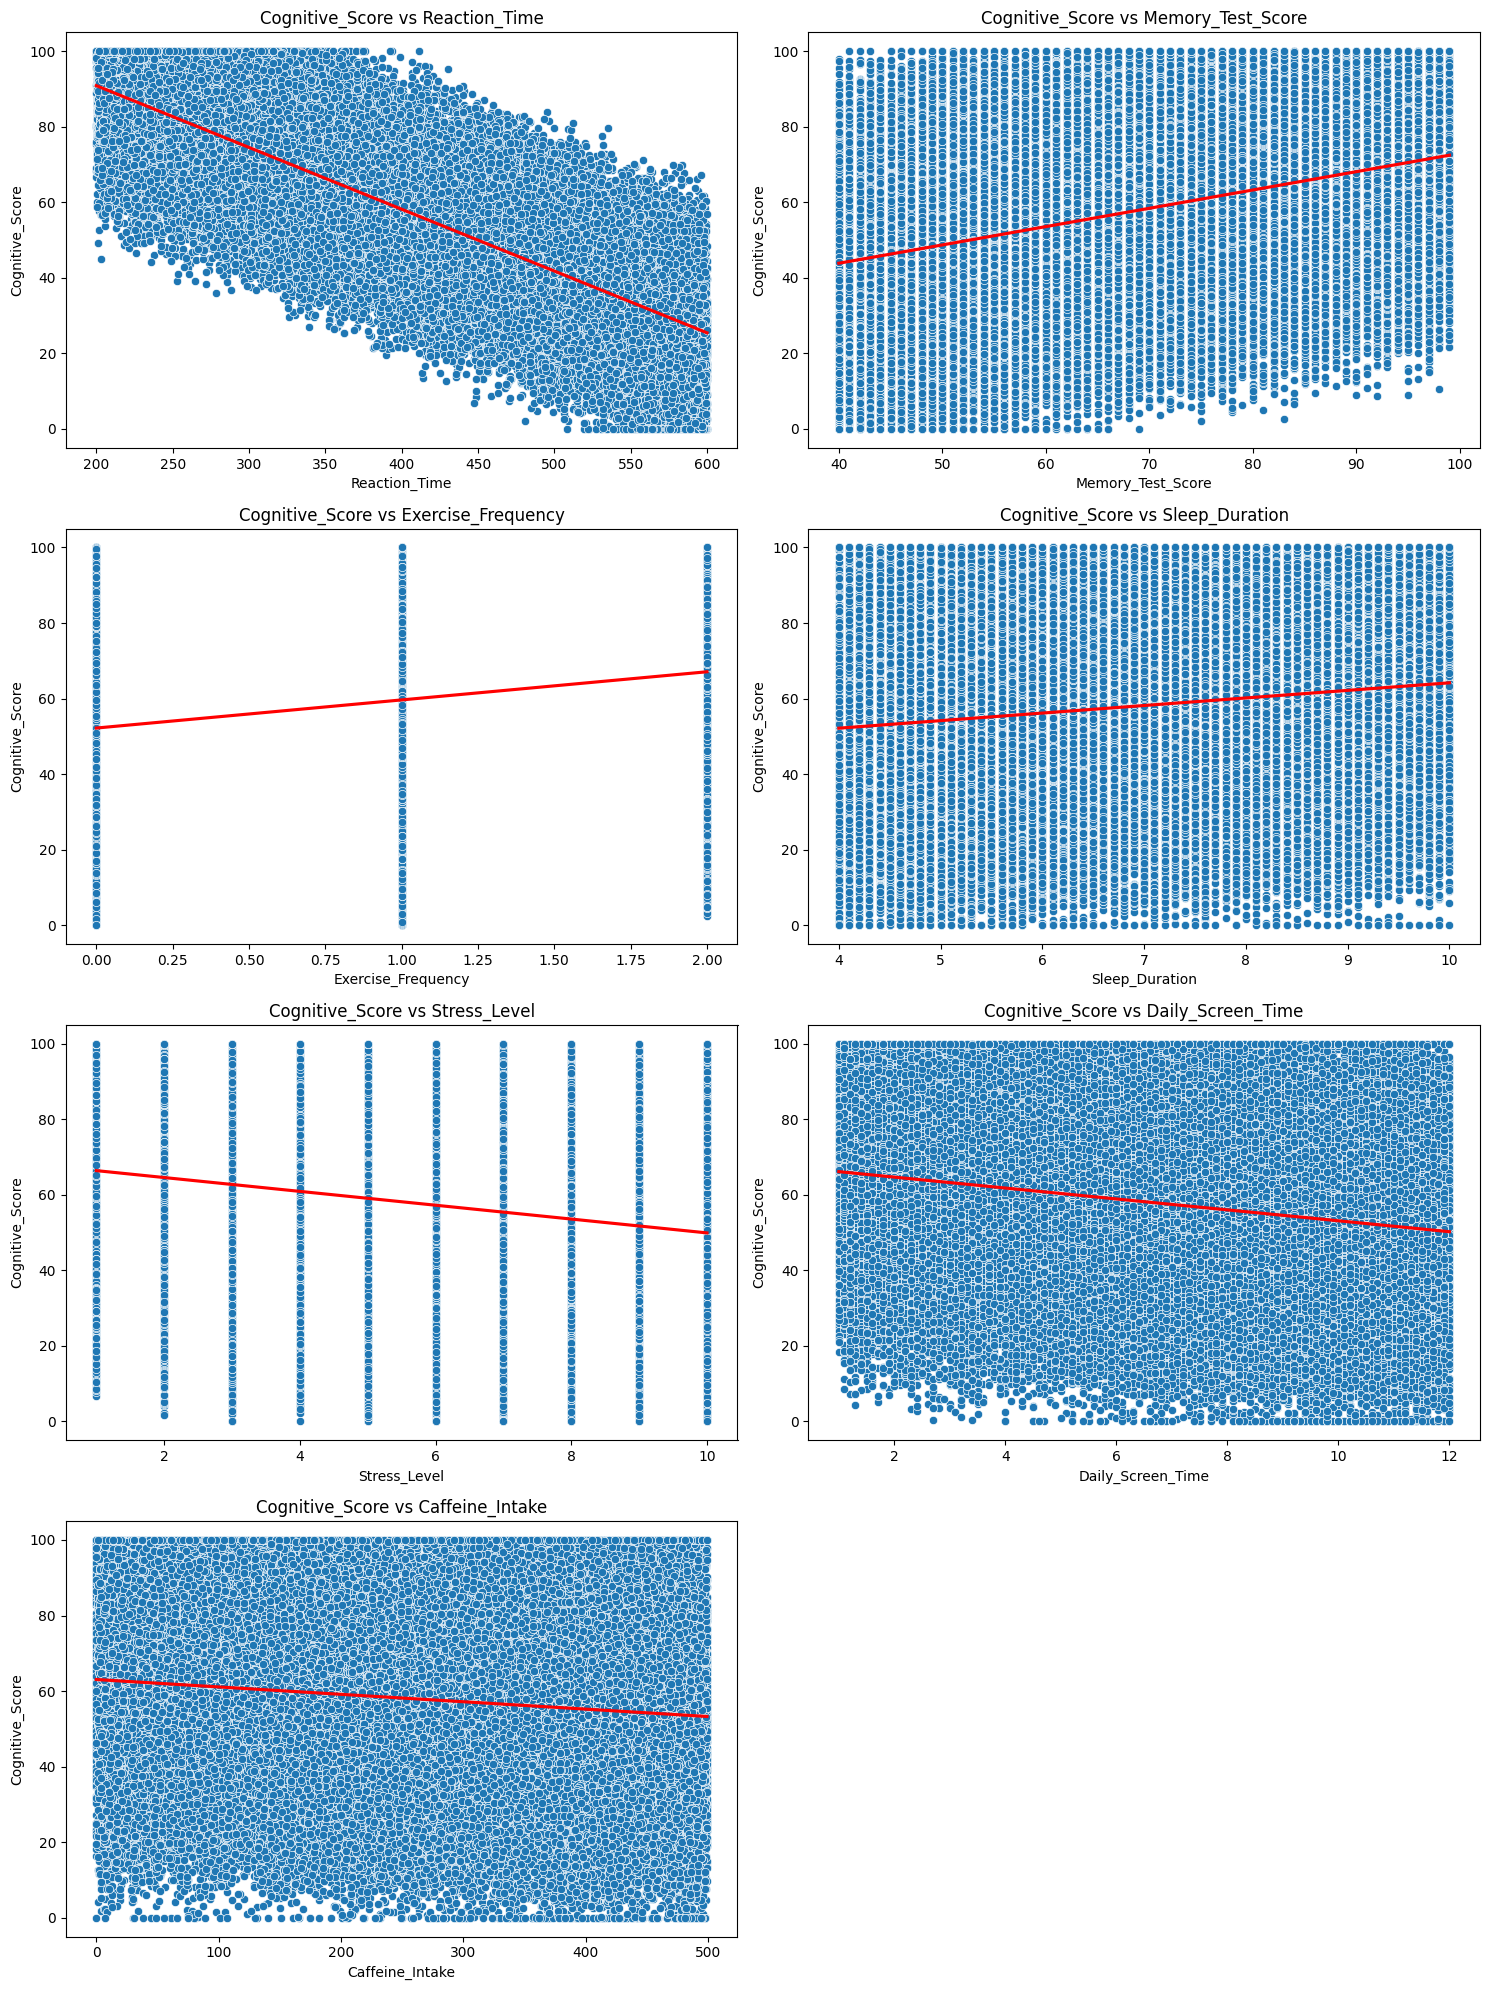

In [ ]:

features = ['Reaction_Time', 'Memory_Test_Score', 'Exercise_Frequency',
            'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(data=df_encoded, x=feature, y='Cognitive_Score')
    sns.regplot(data=df_encoded, x=feature, y='Cognitive_Score', scatter=False, color='red')  # خط الاتجاه
    plt.title(f'Cognitive_Score vs {feature}')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop(columns=['Cognitive_Score'])
y = df_encoded['Cognitive_Score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x.head()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,57,6.5,3,6.5,1,41,583.33,65,1,0,0,1,0,0
1,39,7.6,9,10.8,2,214,368.24,58,1,0,0,1,0,0
2,26,8.2,6,5.7,0,429,445.21,49,0,1,0,0,0,1
3,32,7.8,9,8.3,0,464,286.33,94,0,1,0,0,0,1
4,50,9.7,2,11.3,1,365,237.65,62,0,1,0,1,0,0


In [ ]:
y.head()

,Cognitive_Score
0,36.71
1,54.35
2,32.57
3,70.15
4,87.54


In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
y_pred_lin = lin_reg.predict(x_test_scaled)

In [ ]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])
poly_pipeline.fit(x_train_scaled, y_train)
y_pred_poly = poly_pipeline.predict(x_test_scaled)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)

In [ ]:
base_models = [
    ('linear', LinearRegression()),
    ('poly', poly_pipeline),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]
meta_model = LinearRegression()

stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False
)
stacked_model.fit(x_train_scaled, y_train)
y_pred_stacked = stacked_model.predict(x_test_scaled)

In [ ]:
predictions = {
    "Linear Regression": y_pred_lin,
    "Polynomial Regression": y_pred_poly,
    "KNN Regression": y_pred_knn,

    "Stacking Regressor": y_pred_stacked
}

for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}\n")

Linear Regression Performance:
R²: 0.9934, RMSE: 1.8673, MAE: 1.2983

Polynomial Regression Performance:
R²: 0.9971, RMSE: 1.2269, MAE: 0.6407

KNN Regression Performance:
R²: 0.9532, RMSE: 4.9604, MAE: 3.8832

Stacking Regressor Performance:
R²: 0.9973, RMSE: 1.2021, MAE: 0.6371

